<a href="https://colab.research.google.com/github/Akshats22841485/ML-and-DL/blob/main/catsVdogsvlassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle  # Create .kaggle directory if not exists
!cp kaggle.json ~/.kaggle/  # Copy kaggle.json to the correct directory

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [3]:
# The data is in zip file , now we need to unzip it
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#generators are used below
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [21]:
#Creating CNN models
model=Sequential()
model.add(Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(80,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(80,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 10)        │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 20)        │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 20)        │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 40)          │           7,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 40)          │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 80)          │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 80)          │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 15680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 80)                  │       1,254,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,297,581 (4.95 MB)

 Trainable params: 1,297,281 (4.95 MB)

 Non-trainable params: 300 (1.17 KB)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.5349 - loss: 0.7496 - val_accuracy: 0.5406 - val_loss: 0.6803
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.6212 - loss: 0.6496 - val_accuracy: 0.7242 - val_loss: 0.5429
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.7240 - loss: 0.5592 - val_accuracy: 0.7576 - val_loss: 0.4953
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.7891 - loss: 0.4727 - val_accuracy: 0.7740 - val_loss: 0.4795
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8291 - loss: 0.4004 - val_accuracy: 0.7726 - val_loss: 0.5420
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.8629 - loss: 0.3292 - val_accuracy: 0.8278 - val_loss: 0.3865
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.8949 - loss: 0.2646 - val_accuracy: 0.7962 - val_loss: 0.5060
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9251 - loss: 0.1969 - 

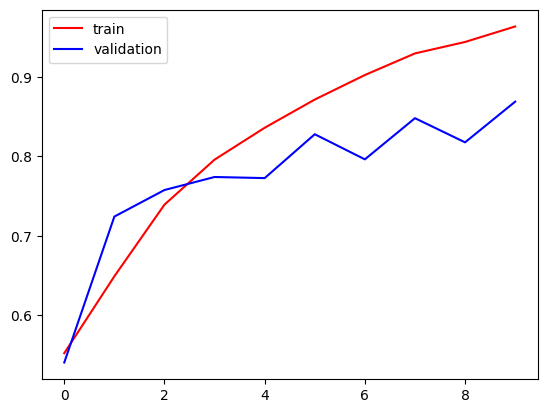

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

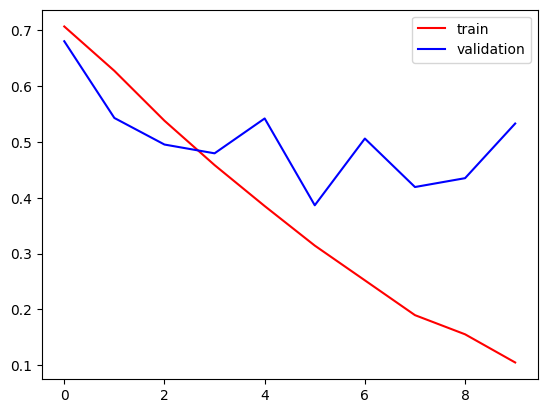

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
import cv2

In [28]:
test_img=cv2.imread('/content/dog1.jpg')

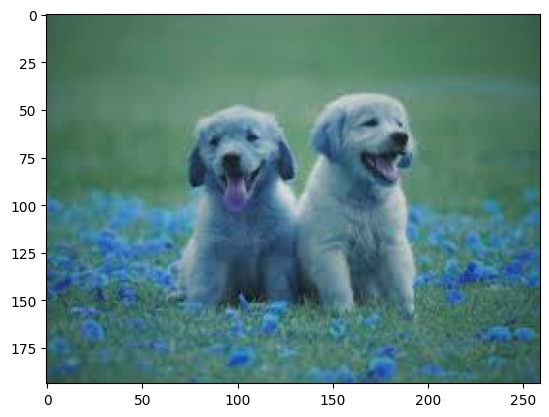

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(194, 259, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [48]:
test_img1=cv2.imread('/content/cat.jpg')

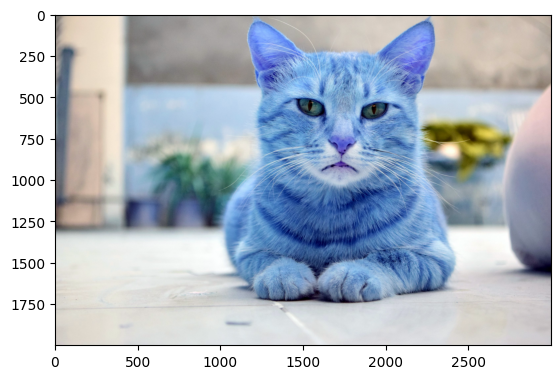

In [49]:
plt.imshow(test_img1)

In [50]:
test_img1.shape

(2000, 3000, 3)

In [51]:
test_img1=cv2.resize(test_img1,(256,256))

In [52]:
test_inpt1=test_img1.reshape((1,256,256,3))

In [53]:
model.predict(test_inpt1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)